# Análise Exploratória - EDA

In [ ]:
# --- BIBLIOTECAS PADRÃO ---
import os

# --- BIBLIOTECAS DE ANÁLISE DE DADOS ---
import numpy as np
import pandas as pd
import geopandas as gpd

# --- BIBLIOTECAS DE VISUALIZAÇÃO ---
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# --- PYSPARK ---
import findspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import (
    avg,
    col,
    count,
    dayofweek,
    desc,
    floor,
    hour,
    lower,
    month,
    spark_sum,
    sum,
    to_timestamp,
    upper,
    when,
    year
)

# --- IPYTHON ---
from IPython import get_ipython

# --- OUTROS ---
os.makedirs("images", exist_ok=True)

os.environ.pop("SPARK_HOME", None)
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"

findspark.init()

# Caminho absoluto do notebook (via IPython)
notebook_path = get_ipython().run_line_magic('pwd', '')

# Altera o diretório de trabalho para o notebook atual
os.chdir(notebook_path)

spark = SparkSession.builder \
    .appName("Pyspark - EDA") \
    .master("local[*]") \
    .getOrCreate()
    
# ==============================================================================
#  PASSO 0: CONFIGURAÇÃO DO AMBIENTE DE PLOTAGEM
# ==============================================================================
print("Configurando ambiente de plotagem...")

# Paleta de cores iFood e cinza para contraste
ifood_palette = {
    'vermelho_ifood': "#EA1D2C",
    'cinza_medio':    "#6E6E6E",
    'cinza_claro':    "#F2F2F2",
    'branco':         "#FFFFFF"
}

# Configurações globais de fonte e estilo
try:
    plt.rcParams['font.family'] = 'Latin Modern Sans'
except:
    print("AVISO: Fonte 'Latin Modern Sans' não encontrada, usando 'sans-serif' como padrão.")
    plt.rcParams['font.family'] = 'sans-serif'

sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['text.color'] = ifood_palette['cinza_medio']
plt.rcParams['axes.labelcolor'] = ifood_palette['cinza_medio']
plt.rcParams['xtick.color'] = ifood_palette['cinza_medio']
plt.rcParams['ytick.color'] = ifood_palette['cinza_medio']

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/06/21 16:52:49 WARN Utils: Your hostname, CVER-CE-628, resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
25/06/21 16:52:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/21 16:52:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Configurando ambiente de plotagem...


### Leitura dos dados

In [36]:
df_consumers_ab_test = spark.read.parquet("processed_data/df_consumers_ab_test.parquet")
df_restaurant = spark.read.parquet("processed_data/df_restaurant.parquet")
# df_order = spark.read.parquet("processed_data/df_order.parquet")
df_all_data = spark.read.parquet("processed_data/df_all_data.parquet")

### 1) Consumers

In [8]:
print("\n--- Análise por Idioma do Usuário ---")

# Contagem de clientes por idioma, ordenado do mais frequente para o menos
language_counts = df_consumers_ab_test.groupBy("language") \
                             .count() \
                             .orderBy(desc("count"))

print("Tabela de quantidade de clientes por idioma:")
language_counts.show()

print("\n--- Análise por Grupo do Teste A/B ---")

# Contagem de clientes por grupo ('target' ou 'control')
group_counts = df_consumers_ab_test.groupBy("is_target").count()

print("Tabela de quantidade de clientes por grupo:")
group_counts.show()

print("\n--- Análise por Código de Área (DDD) ---")

# Contagem de clientes por código de área, mostrando os mais comuns
area_counts = df_consumers_ab_test.groupBy("customer_phone_area") \
                         .count() \
                         .orderBy(desc("count"))

print("Tabela de quantidade de clientes por código de área (Top 20):")
area_counts.show() # Mostrando os 20 principais para concisão

print("\n--- Análise de Status de Atividade do Usuário ---")

# Contagem de clientes por status ('active' = true ou false)
activity_counts = df_consumers_ab_test.groupBy("active").count()

print("Tabela de quantidade de clientes por status de atividade:")
activity_counts.show()


--- Análise por Idioma do Usuário ---
Tabela de quantidade de clientes por idioma:


+--------+------+
|language| count|
+--------+------+
|   pt-br|806154|
|   es-ar|     2|
+--------+------+


--- Análise por Grupo do Teste A/B ---
Tabela de quantidade de clientes por grupo:


+---------+------+
|is_target| count|
+---------+------+
|     true|445743|
|    false|360413|
+---------+------+


--- Análise por Código de Área (DDD) ---
Tabela de quantidade de clientes por código de área (Top 20):


+-------------------+-----+
|customer_phone_area|count|
+-------------------+-----+
|                 60| 8268|
|                 61| 8223|
|                 56| 8201|
|                 62| 8199|
|                 12| 8197|
|                 29| 8189|
|                 88| 8174|
|                 77| 8171|
|                 81| 8169|
|                 59| 8160|
|                 40| 8156|
|                 42| 8155|
|                  3| 8154|
|                 90| 8154|
|                 97| 8154|
|                 99| 8149|
|                 98| 8146|
|                 72| 8145|
|                 76| 8143|
|                 73| 8140|
+-------------------+-----+
only showing top 20 rows

--- Análise de Status de Atividade do Usuário ---
Tabela de quantidade de clientes por status de atividade:


+------+------+
|active| count|
+------+------+
|  true|804561|
| false|  1595|
+------+------+



Gerando Gráfico 1: Distribuição de Clientes no Teste A/B...
Gerando Gráfico 3: Box Plot de DDDs...


Gerando Gráfico 2: KPI Card de Idiomas...


Gerando Gráfico 4: KPI Card de Clientes Ativos...



Exibindo todos os gráficos. Feche cada janela de gráfico para ver a próxima.


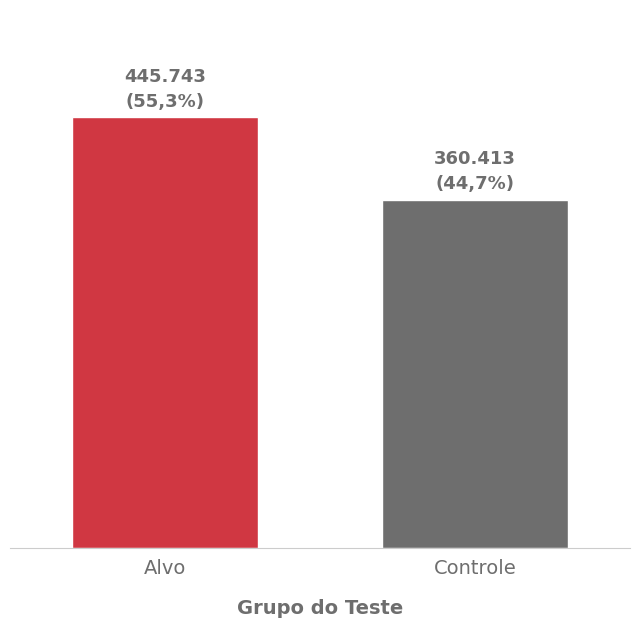

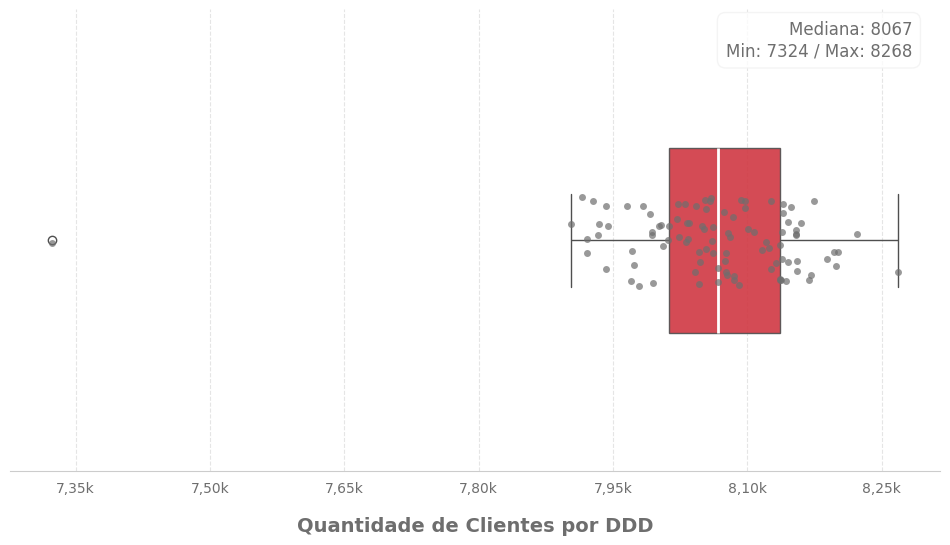

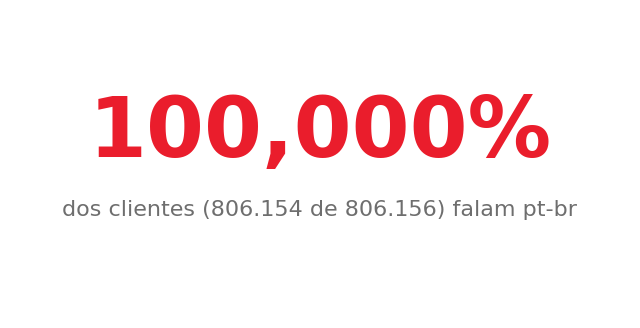

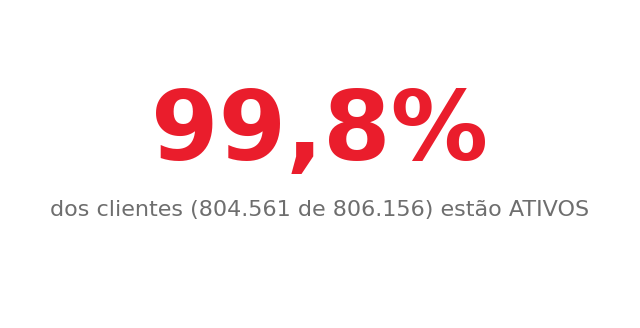

In [11]:
# ==============================================================================
#  GRÁFICO 1: Distribuição de Clientes no Teste A/B (Corrigido com Percentual)
#  Requer o DataFrame PySpark: group_counts
# ==============================================================================
print("Gerando Gráfico 1: Distribuição de Clientes no Teste A/B...")

# Converte o DataFrame Spark para Pandas
group_counts_pd = group_counts.toPandas()

# Mapeia os valores booleanos da coluna 'is_target' para as strings desejadas.
group_counts_pd['is_target'] = group_counts_pd['is_target'].map({
    True: 'Alvo',
    False: 'Controle'
})

# Define um mapa de cores para garantir a consistência
color_map = {'Controle': ifood_palette['cinza_medio'], 'Alvo': ifood_palette['vermelho_ifood']}

fig1, ax1 = plt.subplots(figsize=(8, 7))

# Usa seaborn.barplot para tratamento inteligente de categorias
sns.barplot(ax=ax1, x='is_target', y='count', data=group_counts_pd,
            hue='is_target', palette=color_map, legend=False, width=0.6)

# Calcula o total de clientes para a base do percentual
total_clients = group_counts_pd['count'].sum()

# Adiciona rótulos com número absoluto e percentual
for p in ax1.patches:
    height = p.get_height()
    percentage = (height / total_clients) * 100
    
    label_text = (
        f'{int(height):,}'.replace(',', '.') +
        f'\n({percentage:.1f}%)'.replace('.', ',')
    )
    
    ax1.annotate(
        label_text,
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=13, weight='bold', color=ifood_palette['cinza_medio'],
        xytext=(0, 5), textcoords='offset points',
        linespacing=1.5
    )

# ax1.set_title('Distribuição de Clientes no Teste A/B', fontsize=18, weight='bold', pad=30)
ax1.set_xlabel('Grupo do Teste', fontsize=14, weight='bold', labelpad=15)
ax1.set_ylabel(None)
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1.set_ylim(0, group_counts_pd['count'].max() * 1.25)
ax1.get_yaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.grid(axis='y', linestyle='--', alpha=0.5)
fig1.savefig('images/grafico_grupos_ab_final.png', dpi=300, bbox_inches='tight')


# ==============================================================================
#  GRÁFICO 3: DDDs (Box Plot)
#  Requer o DataFrame PySpark: area_counts
# ==============================================================================
print("Gerando Gráfico 3: Box Plot de DDDs...")

# Converte os 20 principais DDDs do Spark para Pandas
ddd_counts_pd = area_counts.toPandas()

fig3, ax3 = plt.subplots(figsize=(12, 6))

sns.boxplot(ax=ax3, x=ddd_counts_pd['count'], color=ifood_palette['vermelho_ifood'], width=0.4,
            boxprops=dict(alpha=0.9), medianprops=dict(color='white', linewidth=2))
sns.stripplot(ax=ax3, x=ddd_counts_pd['count'], color=ifood_palette['cinza_medio'], alpha=0.7)

# Identifica e anota o outlier
Q1 = ddd_counts_pd['count'].quantile(0.25)
Q3 = ddd_counts_pd['count'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
outliers = ddd_counts_pd[ddd_counts_pd['count'] > upper_bound]

for index, row in outliers.iterrows():
    ax3.annotate(f"Outlier: DDD {row['customer_phone_area']}",
                 (row['count'], 0),
                 xytext=(0, -30), textcoords='offset points',
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color=ifood_palette['vermelho_ifood']),
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=ifood_palette['cinza_claro'], lw=1, alpha=0.9))

# Corrige a escala do eixo X para evitar repetição
ax3.xaxis.set_major_locator(plt.MaxNLocator(nbins=8, integer=True))
ax3.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.2f}k'.replace('.',',')))

# Anotações de texto e estética
median_val_g3 = ddd_counts_pd['count'].median()
min_val_g3 = ddd_counts_pd['count'].min()
max_val_g3 = ddd_counts_pd['count'].max()
ax3.text(0.97, 0.9, f'Mediana: {int(median_val_g3)}\nMin: {min_val_g3} / Max: {max_val_g3}',
         transform=ax3.transAxes, ha='right', fontsize=12,
         bbox=dict(boxstyle='round,pad=0.5', fc='white', ec=ifood_palette['cinza_claro'], alpha=0.8))

# ax3.set_title('Consistência na Contagem de Clientes nos DDDs', fontsize=18, weight='bold', pad=20)
ax3.set_xlabel('Quantidade de Clientes por DDD', fontsize=14, weight='bold', labelpad=15)
ax3.get_yaxis().set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.grid(axis='x', linestyle='--', alpha=0.5)
fig3.savefig('images/boxplot_ddds_final.png', dpi=300, bbox_inches='tight')


# ==============================================================================
#  GRÁFICO 2: Idiomas (KPI Card)
#  Requer o DataFrame PySpark: language_counts
# ==============================================================================
print("Gerando Gráfico 2: KPI Card de Idiomas...")

language_counts_pd = language_counts.toPandas()

total_clientes_g2 = language_counts_pd['count'].sum()
main_lang_count = language_counts_pd['count'].iloc[0]
main_lang_name = language_counts_pd['language'].iloc[0]
main_lang_percent = (main_lang_count / total_clientes_g2) * 100

fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

ax2.text(0.5, 0.6, f'{main_lang_percent:.3f}%'.replace('.',','),
         ha='center', va='center', fontsize=60, weight='bold',
         color=ifood_palette['vermelho_ifood'], fontname=plt.rcParams['font.family'])
ax2.text(0.5, 0.35, f'dos clientes ({main_lang_count:,} de {total_clientes_g2:,}) falam {main_lang_name}'.replace(',', '.'),
         ha='center', va='center', fontsize=16, color=ifood_palette['cinza_medio'],
         fontname=plt.rcParams['font.family'])
# ax2.set_title('Idioma Principal da Base de Clientes', fontsize=18, weight='bold', pad=20)
fig2.savefig('images/kpi_idioma_final.png', dpi=300, bbox_inches='tight')


# ==============================================================================
#  GRÁFICO 4: Clientes Ativos (KPI Card)
#  Requer o DataFrame PySpark: activity_counts
# ==============================================================================
print("Gerando Gráfico 4: KPI Card de Clientes Ativos...")

activity_counts_pd = activity_counts.toPandas()

total_g4 = activity_counts_pd['count'].sum()
ativos_g4 = activity_counts_pd[activity_counts_pd['active'] == True]['count'].iloc[0]
ativos_percent_g4 = (ativos_g4 / total_g4) * 100

fig4, ax4 = plt.subplots(figsize=(8, 4))
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
for spine in ax4.spines.values():
    spine.set_visible(False)

ax4.text(0.5, 0.6, f'{ativos_percent_g4:.1f}%'.replace('.',','),
         ha='center', va='center', fontsize=70, weight='bold',
         color=ifood_palette['vermelho_ifood'], fontname=plt.rcParams['font.family'])

# ##-- ÚLTIMO AJUSTE: Adicionar números absolutos no subtítulo --##
subtitle_text = f'dos clientes ({ativos_g4:,} de {total_g4:,}) estão ATIVOS'.replace(',', '.')
ax4.text(0.5, 0.35, subtitle_text,
         ha='center', va='center', fontsize=16, color=ifood_palette['cinza_medio'],
         fontname=plt.rcParams['font.family'])
         
# ax4.set_title('Engajamento da Base de Clientes', fontsize=18, weight='bold', pad=20)
fig4.savefig('images/kpi_ativos_final.png', dpi=300, bbox_inches='tight')


# ==============================================================================
#  Exibe todos os gráficos gerados
# ==============================================================================
print("\nExibindo todos os gráficos. Feche cada janela de gráfico para ver a próxima.")
plt.show()

### 2) Orders

In [27]:
df_consumers_ab_test.printSchema()

root
 |-- customer_id: string (nullable = true)
 |-- language: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- active: boolean (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- customer_phone_area: string (nullable = true)
 |-- customer_phone_number: string (nullable = true)
 |-- ano_criacao: integer (nullable = true)
 |-- mes_criacao: integer (nullable = true)
 |-- is_target: boolean (nullable = true)



Gerando gráfico: Distribuição do Valor dos Pedidos...


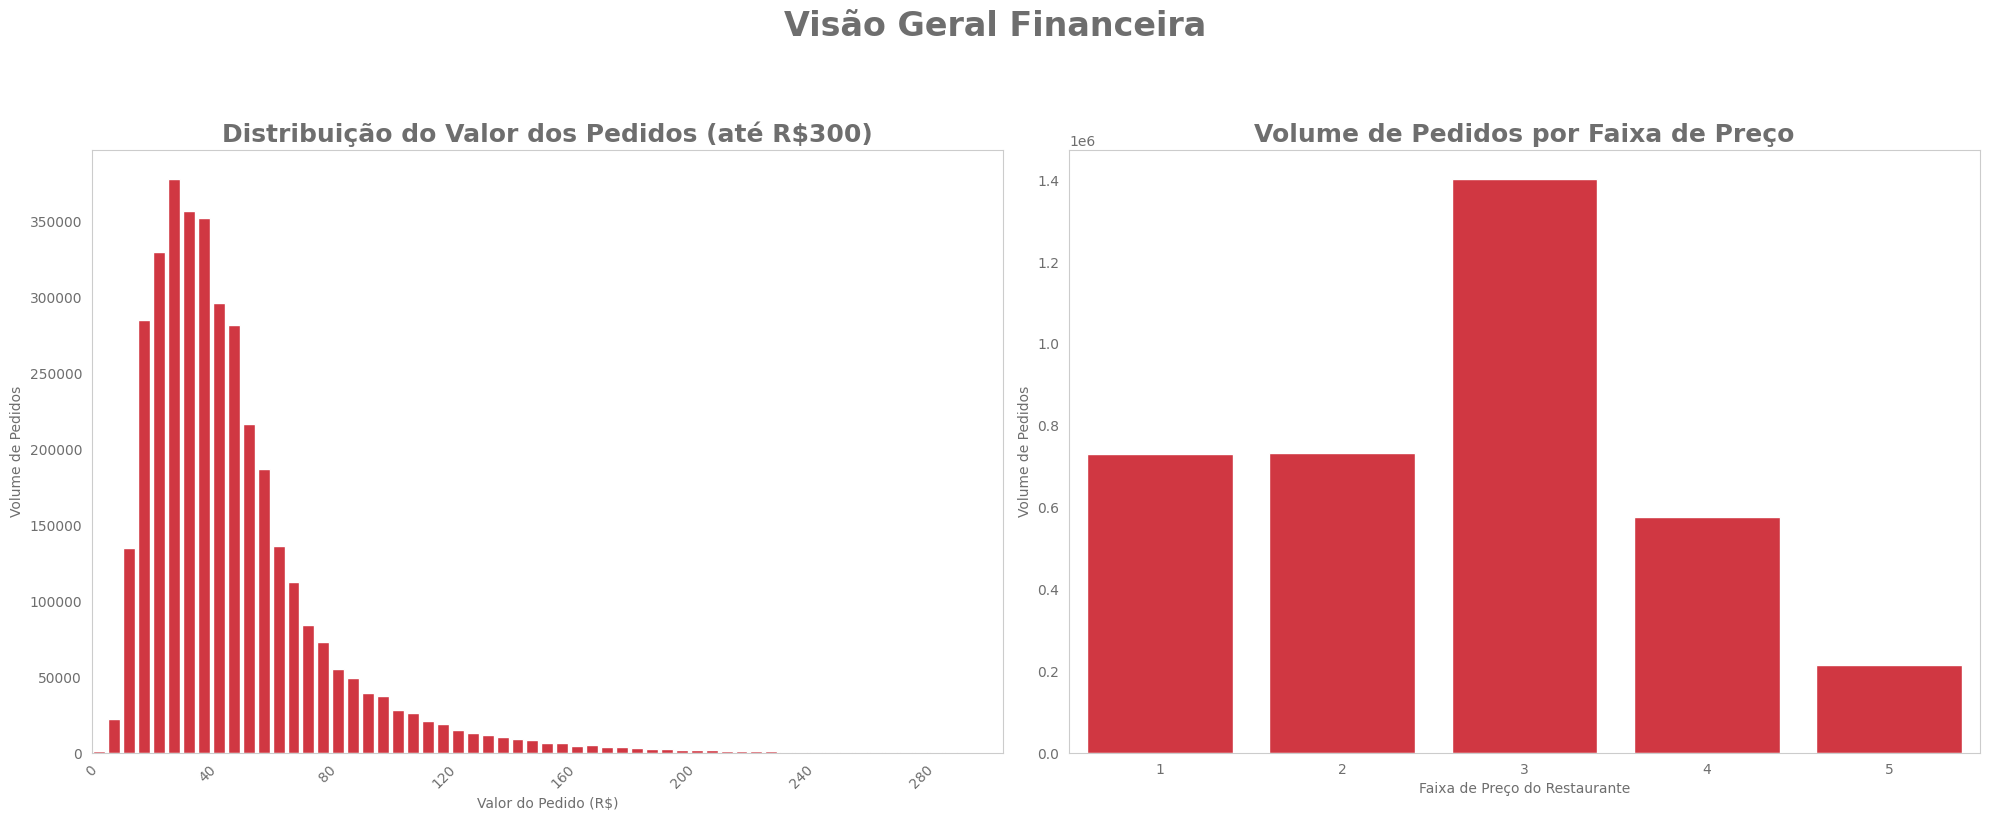

Gerando gráfico: Análise Temporal...


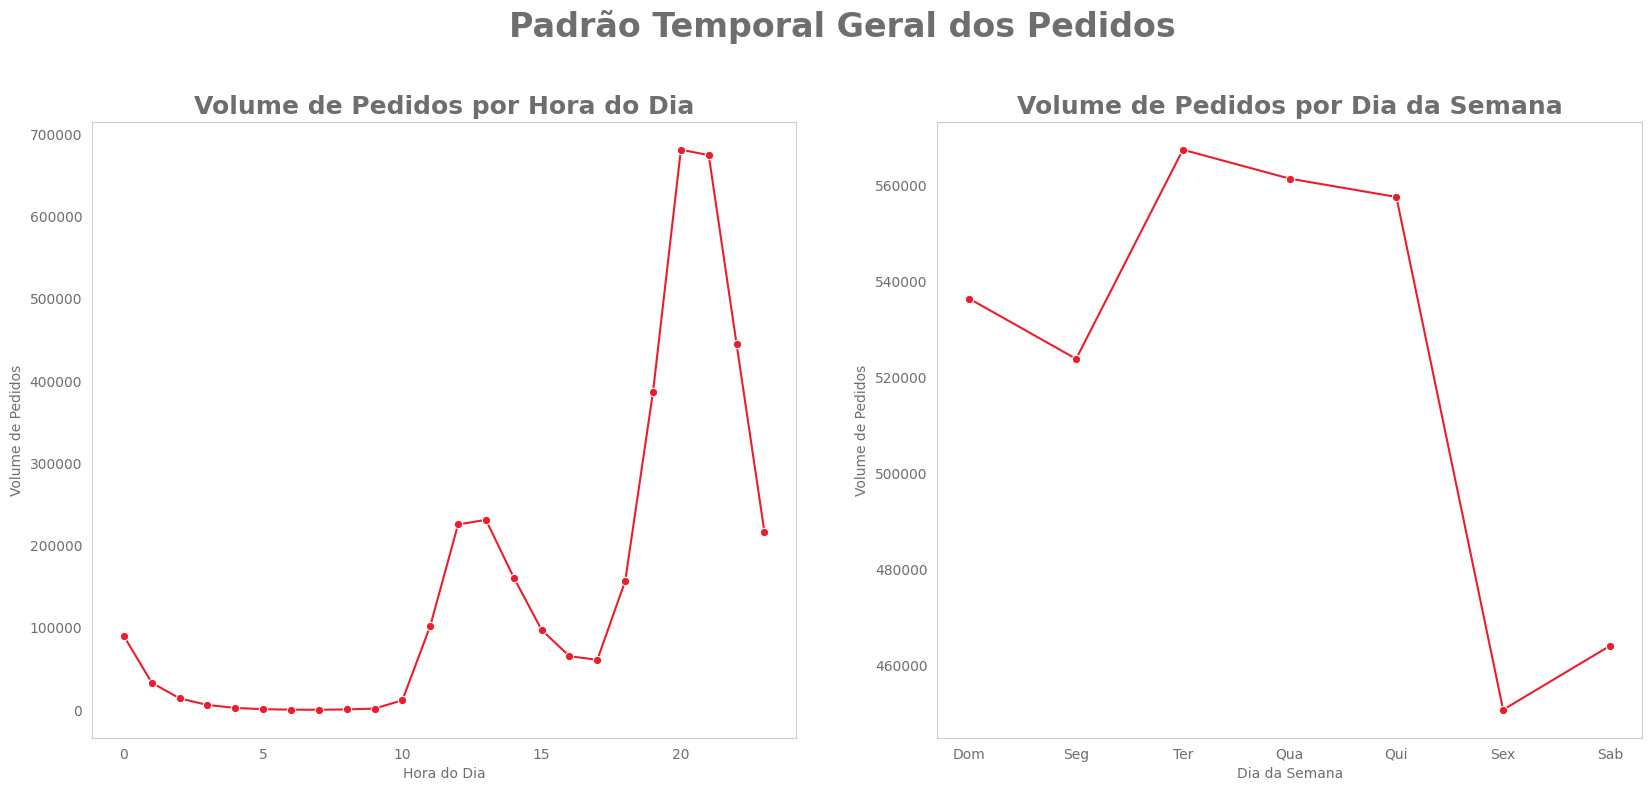

Gerando gráficos: Análise Geográfica por Top 10 Estados...


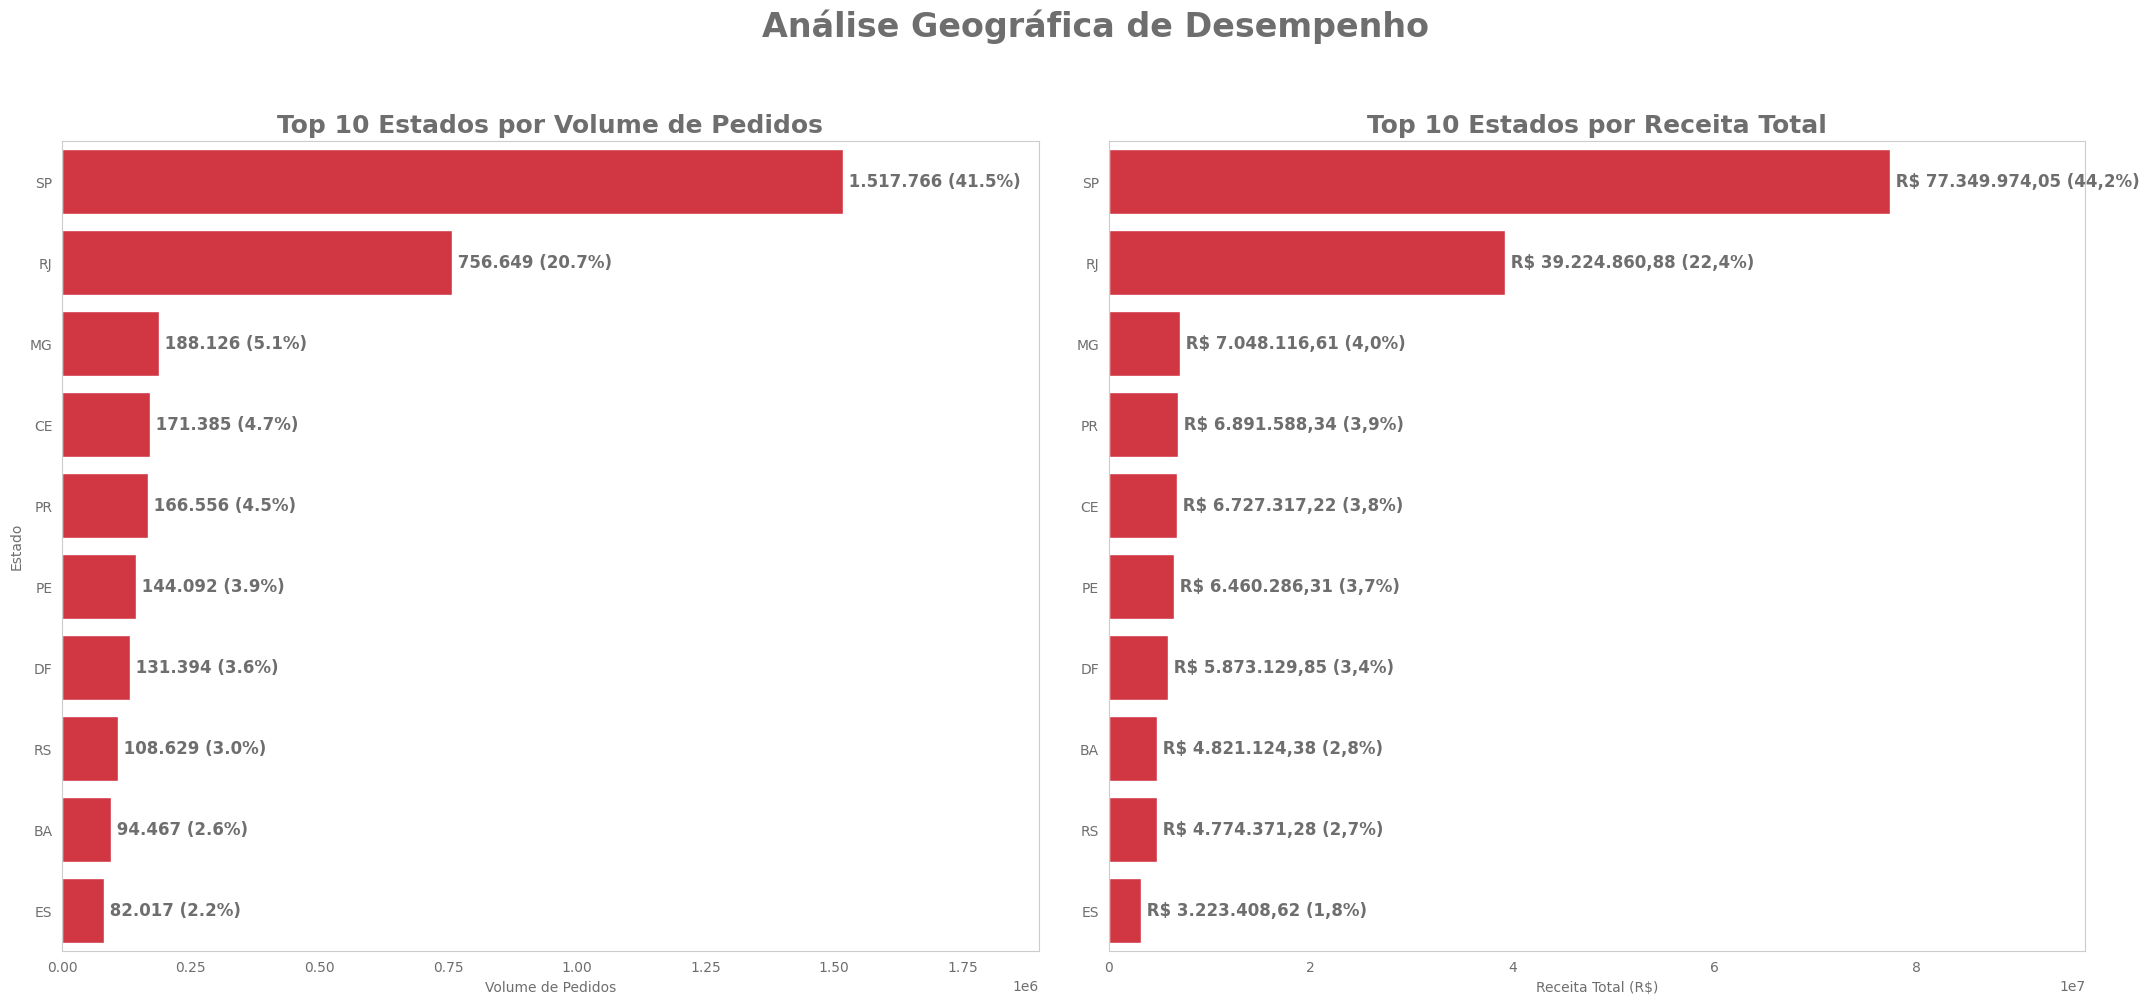

In [ ]:
# ==============================================================================
#  1. VISÃO GERAL FINANCEIRA E POR FAIXA DE PREÇO
# ==============================================================================
# (Esta seção permanece inalterada)
print("Gerando gráfico: Distribuição do Valor dos Pedidos...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
bin_width = 5
df_binned = df_all_data.withColumn("amount_bin", floor(col("order_total_amount") / bin_width) * bin_width)
histogram_pd = df_binned.groupBy("amount_bin").count().orderBy("amount_bin").toPandas()
histogram_pd_filtrado = histogram_pd[histogram_pd['amount_bin'] <= 300]
sns.barplot(x='amount_bin', y='count', data=histogram_pd_filtrado, color=ifood_palette['vermelho_ifood'], ax=ax1)
ax1.set_title('Distribuição do Valor dos Pedidos (até R$300)', fontsize=18, weight='bold')
ax1.set_xlabel('Valor do Pedido (R$)')
ax1.set_ylabel('Volume de Pedidos')
ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True, nbins=10))
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
price_range_pd = df_all_data.groupBy("price_range").count().orderBy("price_range").toPandas()
sns.barplot(x='price_range', y='count', data=price_range_pd, color=ifood_palette['vermelho_ifood'], ax=ax2)
ax2.set_title('Volume de Pedidos por Faixa de Preço', fontsize=18, weight='bold')
ax2.set_xlabel('Faixa de Preço do Restaurante')
ax2.set_ylabel('Volume de Pedidos')
plt.suptitle('Visão Geral Financeira', fontsize=24, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# ==============================================================================
#  2. ANÁLISE DO PADRÃO TEMPORAL DE PEDIDOS (COM CORREÇÃO)
# ==============================================================================
print("Gerando gráfico: Análise Temporal...")
# Agregações em PySpark
orders_by_hour = df_all_data.groupBy(hour("order_created_at").alias("hora")).count().orderBy("hora").toPandas()
orders_by_day = df_all_data.groupBy(dayofweek("order_created_at").alias("dia_semana")).count().orderBy("dia_semana").toPandas()
dias_map = {1: 'Dom', 2: 'Seg', 3: 'Ter', 4: 'Qua', 5: 'Qui', 6: 'Sex', 7: 'Sab'}
orders_by_day['dia_semana'] = orders_by_day['dia_semana'].map(dias_map)

# ##-- AJUSTE 1: Forçar a ordem correta dos dias da semana --##
dias_ordenados = ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab']
orders_by_day['dia_semana'] = pd.Categorical(orders_by_day['dia_semana'], categories=dias_ordenados, ordered=True)
# Ordena o DataFrame de acordo com a nova ordem categórica
orders_by_day = orders_by_day.sort_values('dia_semana')

# Plotagem
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.lineplot(x='hora', y='count', data=orders_by_hour, color=ifood_palette['vermelho_ifood'], marker='o', ax=ax1)
ax1.set_title('Volume de Pedidos por Hora do Dia', fontsize=18, weight='bold')
ax1.set_xlabel('Hora do Dia')
ax1.set_ylabel('Volume de Pedidos')

sns.lineplot(x='dia_semana', y='count', data=orders_by_day, color=ifood_palette['vermelho_ifood'], marker='o', ax=ax2)
ax2.set_title('Volume de Pedidos por Dia da Semana', fontsize=18, weight='bold')
ax2.set_xlabel('Dia da Semana')
ax2.set_ylabel('Volume de Pedidos')

plt.suptitle('Padrão Temporal Geral dos Pedidos', fontsize=24, weight='bold', y=1.02)
plt.show()


# ==============================================================================
#  3. ANÁLISE GEOGRÁFICA (COM CORREÇÃO NAS ANOTAÇÕES)
# ==============================================================================
print("Gerando gráficos: Análise Geográfica por Top 10 Estados...")

# --- Preparação dos Dados em PySpark ---
total_pedidos = df_all_data.count()
total_receita = df_all_data.agg(sum("order_total_amount")).first()[0]
top_10_pedidos_pd = df_all_data.groupBy("delivery_address_state").count() \
    .withColumn("percentual", (col("count") / total_pedidos) * 100) \
    .orderBy(col("count").desc()).limit(10).toPandas()
top_10_receita_pd = df_all_data.groupBy("delivery_address_state").agg(sum("order_total_amount").alias("receita")) \
    .withColumn("percentual", (col("receita") / total_receita) * 100) \
    .orderBy(col("receita").desc()).limit(10).toPandas()
    
# --- Plotagem ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

# Gráfico de Barras Horizontais para Top 10 Pedidos
sns.barplot(x='count', y='delivery_address_state', data=top_10_pedidos_pd, color=ifood_palette['vermelho_ifood'], ax=ax1)
ax1.set_title('Top 10 Estados por Volume de Pedidos', fontsize=18, weight='bold')
ax1.set_xlabel('Volume de Pedidos')
ax1.set_ylabel('Estado')
# ##-- AJUSTE 2: Ajuste nas anotações --##
# Adiciona um espaço extra no eixo X para as legendas
ax1.set_xlim(0, top_10_pedidos_pd['count'].max() * 1.25)
for index, row in top_10_pedidos_pd.iterrows():
    label = f"{row['count']:,} ({row['percentual']:.1f}%)".replace(",", ".")
    # Posiciona o texto à direita da barra, com cor cinza
    ax1.text(row['count'], index, f' {label}', va='center', ha='left', fontsize=12, color=ifood_palette['cinza_medio'], weight='bold')

# Gráfico de Barras Horizontais para Top 10 Receita
sns.barplot(x='receita', y='delivery_address_state', data=top_10_receita_pd, color=ifood_palette['vermelho_ifood'], ax=ax2)
ax2.set_title('Top 10 Estados por Receita Total', fontsize=18, weight='bold')
ax2.set_xlabel('Receita Total (R$)')
ax2.set_ylabel('')
# ##-- AJUSTE 2: Ajuste nas anotações --##
ax2.set_xlim(0, top_10_receita_pd['receita'].max() * 1.25)
for index, row in top_10_receita_pd.iterrows():
    label = f"R$ {row['receita']:,.2f} ({row['percentual']:.1f}%)".replace(",", "X").replace(".", ",").replace("X", ".")
    # Posiciona o texto à direita da barra, com cor cinza
    ax2.text(row['receita'], index, f' {label}', va='center', ha='left', fontsize=12, color=ifood_palette['cinza_medio'], weight='bold')

plt.suptitle('Análise Geográfica de Desempenho', fontsize=24, weight='bold', y=1.0)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

-----------------------------